# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np
import regex as re

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
def whole_dataframe():
    #1)Energy dataframe
    Energy = pd.read_excel("assets/Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='inner', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='inner', left_index=True, right_index=True)
    result.columns = result.columns.str.strip()

    result = result.sort_values(by = 'Rank', ascending=True)
    columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable']+[str(year) for year in range(2006, 2016)]

    result = result[columns_to_keep]

    return result

whole_dataframe()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maldives,183,1,1,1,0,1.00,1,1.500000e+07,43.0,0.00000,1.862196e+09,2.063143e+09,2.320557e+09,2.192661e+09,2.323402e+09,2.525755e+09,2.588810e+09,2.710479e+09,2.886134e+09,2.929826e+09
Belize,185,1,1,6,0,6.00,1,1.300000e+07,39.0,64.69003,1.285312e+09,1.299522e+09,1.341485e+09,1.352206e+09,1.397113e+09,1.426484e+09,1.479846e+09,1.499280e+09,1.560479e+09,1.590417e+09
Palau,186,1,1,0,0,0.00,0,3.000000e+06,152.0,18.75000,2.074094e+08,2.072990e+08,1.957150e+08,1.779528e+08,1.838000e+08,1.930672e+08,1.992454e+08,1.943911e+08,2.026654e+08,2.216412e+08


### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. `'Italy9'` should be `'Italy'`. 

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [3]:
def answer_one():
    #1)Energy dataframe
    Energy = pd.read_excel("assets/Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='inner', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='inner', left_index=True, right_index=True)
    result.columns = result.columns.str.strip()

    result = result.sort_values(by = 'Rank', ascending=True).head(15)
    columns_to_keep = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable']+[str(year) for year in range(2006, 2016)]

    result = result[columns_to_keep]
    return result

In [4]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [5]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [6]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [7]:
def answer_two():
    
    #1)Energy dataframe
    Energy = pd.read_excel("assets/Energy Indicators.xls", usecols= "C:F", skiprows=16, skipfooter=(283-245))
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Renewable Electricity Production': '% Renewable', 'Energy Supply per capita': 'Energy Supply per Capita'}, inplace=True)
    Energy.drop(index=0, inplace=True) # Removing the row specifying the energy units
    Energy.replace("...", np.NaN, inplace=True) #replacing "..." with "NAN" VALUES
    Energy['Energy Supply'] = Energy['Energy Supply']*1e6 # There are 1 M gigajoules in a petajoule

    #renaming the countries with  parenthesis in their name
    Energy = Energy.replace(to_replace="\s\([^)]*\)", value= "", regex= True )
    #renaming the countries with digits in their name
    Energy = Energy.replace(to_replace="(?<=\w)\d", value="", regex=True) 

    #renaming the countries specified in the question
    rename_dict = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
        }
    Energy['Country'] = Energy['Country'].replace(rename_dict)
    
    #setting the columns 'Country' as index for further merging
    Energy.set_index('Country', inplace=True)


    #2) GDP dataframe
    GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True   )

    rename_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}
    GDP['Country'].replace(rename_dict, inplace=True)

    GDP.set_index('Country', inplace=True)
    
    # 3) Scimag dataframe

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn.set_index('Country', inplace=True)

    # 4) Merging the 3 dataframes Energy, GDP and ScimEn

    result1 = pd.merge(GDP , Energy, how='outer', left_index=True, right_index=True)
    result = pd.merge(result1, ScimEn, how='outer', left_index=True, right_index=True)

    return result.shape[0] - answer_one().shape[0]

    
    raise NotImplementedError()

In [8]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [9]:
def answer_three():
    
    #GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
    GDP = answer_one()

    columns_to_keep = [str(year) for year in range(2006,2016)]
    GDP = GDP[columns_to_keep]

    #getting the average for row across multiple columns
    GDP['AVG'] = GDP.apply(np.nanmean, axis=1) 

    avgGDP = GDP['AVG'].sort_values(ascending=False).head(15)

    return avgGDP

answer_three()


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: AVG, dtype: float64

In [10]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [11]:
def answer_four():
   #Getting the country with the 6th largest GDP
    sixth_largest = answer_three().index[5]

    GDP = answer_one()

    columns_to_keep = [str(year) for year in range(2006,2016)]

    GDP = GDP[columns_to_keep].loc[sixth_largest]

    #the difference between 2006 and 2015 'first and last elements'
    increase = GDP.iloc[-1]-GDP.iloc[0]

    return increase

answer_four()
    

246702696075.3999

In [12]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [44]:
def answer_five():
 
    df = answer_one()
    

    return df['Energy Supply per Capita'].mean() #the mean() method excludes NaN values


In [14]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [15]:
def answer_six():

    #setting up the Energy dataframe

    df = answer_one()
    
    max_renewable = df.sort_values(by='% Renewable', ascending=False).head(1) #there are various countries with 100% renewable

    country_name = max_renewable.index[0]
    #renewable_value = max_renewable.loc[country_name]['% Renewable']
    renewable_value = max_renewable.iloc[0]['% Renewable']
    
    return (country_name, renewable_value)
    

In [16]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [17]:
def answer_seven():
   
    df = answer_one()

    df['Citations Ratio'] = df['Self-citations']/df['Citations']

    #max_row = ScimEn.sort_values(by='Citations Ratio', ascending=False).head(1)
    max_ratio_name = df['Citations Ratio'].idxmax()
    max_ratio_value = df.loc[max_ratio_name]['Citations Ratio']
    return (max_ratio_name, max_ratio_value)

In [18]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [34]:
def answer_eight():
    
    # Population = EnergySupply/EnergySupplyperCapita

    df = answer_one()
   

    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']

    # max_population_name = Energy['Population'].idxmax() IT GETS CHINA, which makes sense!!!

    """THE FOLLOWING METHOD IS INEFFICIENT. INSTEAD WHICH SHOULD USE .nlargest()
    third_population_name = df.sort_values(by='Population', ascending=False).iloc[2].name
    third_population_value = df.sort_values(by='Population', ascending=False).iloc[2]['Energy Supply']
    """

    # Top_3_population_name = Energy['Population'].nlargest(3)[2] # Get the 3 greatest values
    third_population_name = df['Population'].nlargest(3).index[2]



    return third_population_name

In [35]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [36]:
def answer_nine():
   
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    df['Citable Documents per Capita'] = df['Citable documents']/df['Population']

    #df['Citable Documents per Capita'].isna().any()  returns True
    #True in np.isinf(df['Citable Documents per Capita']) # RETURNS FALSE!
    #np.nan in df['Citable Documents per Capita'] # RETURNS FALSE
    
    #df['Citable Documents per Capita'].dropna()

    #corr, pval = stats.pearsonr(df['Citable Documents per Capita'], df['Energy Supply per Capita'])
    #print(corr)

    correlation = df['Citable Documents per Capita'].corr(df['Energy Supply per Capita'])

    return correlation
    

In [22]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

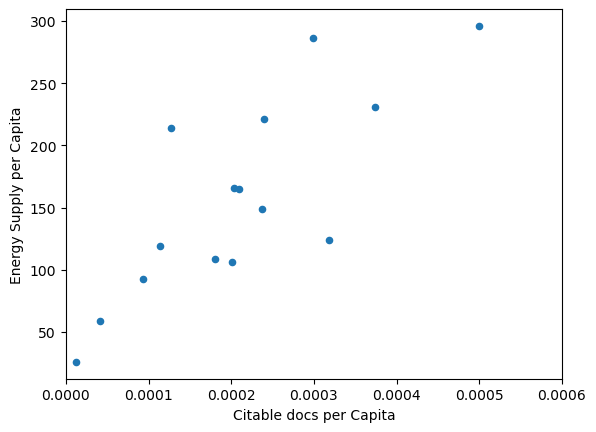

In [23]:
plot9()

In [37]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [38]:
def answer_ten():

    top15 = answer_one()
    median = top15['% Renewable'].median()

    def create_category(x, M):
        if x >= M:
            return 1
        else:
            return 0
        
    df = top15
    df['HighRenew'] = df['% Renewable'].apply(lambda x: create_category(x, median))
        
    return df['HighRenew']

In [39]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [47]:
def answer_eleven():
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

    #ContinentDict[df.index[0]] #GIVES ME THE CONTINENT
    
    #df = whole_dataframe().sort_values(by='Rank', ascending=True).head(15)
    df = answer_one()
    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    
    #df.reset_index()

    df['Continent'] = df.index.map(lambda country: ContinentDict[country]) #use it when handling indexes. df['Continent'] = df.apply(lambda x: continent(x, ContinentDict)) #doesn't work
    df = df.groupby('Continent')['Population'].agg(size = np.size, sum = np.sum, mean = np.nanmean, std = np.nanstd)
    df.rename({'nanmean': 'mean', 'nanstd': 'std'}, inplace = True)

    return df
    

answer_eleven()



,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [48]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [49]:
def answer_twelve():

    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    top15 = answer_one()

    top15['Continent'] = top15.index.map(lambda x: ContinentDict[x])

    top15['% Renewable Bins'] = pd.cut(top15['% Renewable'], bins = 5)
    
    # We use size() to count the number of countries in each group.
    grouped = top15.groupby(['Continent', '% Renewable']).size()

    return grouped#[ grouped > 0]#we don't include groups with no countries
    


In [46]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 25, "Q12: Wrong result numbers!"


AssertionError: Q12: Wrong result numbers!

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [31]:
def answer_thirteen():
    
    df = answer_one()

    df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
    

    PopEst = df['Population'].apply(lambda x: str(x))

    def format_with_separators(number_str):
        # Split the number on the decimal point if it exists
        parts = number_str.split('.')
        
        # The part before the decimal point is formatted with thousands separators
        integer_part_formatted = "{:,}".format(int(parts[0]))
        
        # If there was a decimal part, recombine it with the formatted integer part
        if len(parts) > 1:
            return integer_part_formatted + '.' + parts[1]
        else:
            return integer_part_formatted

    PopEst = PopEst.apply(lambda x: format_with_separators(x))

    return PopEst

type(answer_thirteen())

pandas.core.series.Series

In [32]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [33]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")